
Import your libraries.

In [255]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread 
from mpl_toolkits.mplot3d import Axes3D 
import scipy.ndimage as ndimage

Use a curl operator to pull up whatever image you're wanting to do online.  There are a lot of ways to pull up an image, but in class this is an easy way to just point to an image you like with a url. It will look like this: 
! curl -O https://somewebsitewithyourimage.png

In [256]:
! curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Abraham_Lincoln_O-117_by_Gardner%2C_1865.png/397px-Abraham_Lincoln_O-117_by_Gardner%2C_1865.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175k  100  175k    0     0   329k      0 --:--:-- --:--:-- --:--:--  330k


Let's take a look at Abe.  First we read the image 
img = plt.imread('nameofimage.jpg'), then we show the image with plt.imshow(img, cmap = plt.cm.gray).  For fun you can always play around with colormap choices in matplotlib. https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [257]:
img = plt.imread('397px-Abraham_Lincoln_O-117_by_Gardner%2C_1865.png')

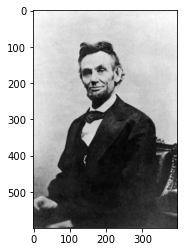

In [258]:
plt.imshow(img, cmap = plt.cm.gray)

In [259]:
imageFile = '397px-Abraham_Lincoln_O-117_by_Gardner%2C_1865.png' 
mat = imread('397px-Abraham_Lincoln_O-117_by_Gardner%2C_1865.png') 

In [260]:
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:mat.shape[0], 0:mat.shape[1]]

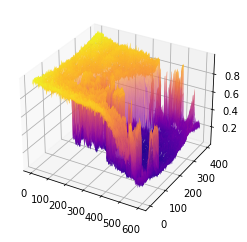

In [261]:
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, mat ,rstride=1, cstride=1, cmap=plt.cm.plasma,
        linewidth=0)

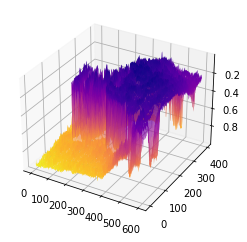

In [262]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.invert_zaxis()
ax.plot_surface(xx, yy, mat ,rstride=1, cstride=1, cmap=plt.cm.plasma,
        linewidth=0)

So if we were to look at the waves that make up Abraham Lincoln, you can see how there are 600 waves making up the horizontal axis and 400 waves making up the vertical axis. Do these waves have periodicity? Could they contain other waves? It's more intuitive to start to think about using Fourier analysis on images with periodicity, so let's start there, with an image of a simple sin wave. 

In [263]:
! curl -O https://i.stack.imgur.com/uAcHP.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   342  100   342    0     0   2220      0 --:--:-- --:--:-- --:--:--  2235


In [264]:
img = plt.imread('uAcHP.png')

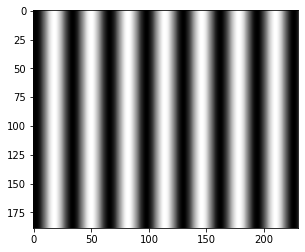

In [265]:
plt.imshow(img, cmap = plt.cm.gray)

In [266]:
imageFile = 'uAcHP.png'
mat = imread('uAcHP.png') 

In [267]:
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:mat.shape[0], 0:mat.shape[1]]

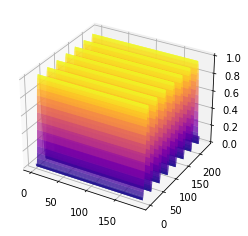

In [268]:
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, mat ,rstride=1, cstride=1, cmap=plt.cm.plasma,
        linewidth=0)

Now if we view this from the side (y axis) we can see our sine wave, with its purple troughs and yellow peaks. You could imagine taking the fourier transform of that sine wave, along the pixel's row to find the frequency of that component of the image.  What would it be? How many peaks are in 250 pixels? I see seven.  So if we were to take the Fourier transform of the y column of pixels, we would see one peak at 0.028 in frequency space.